In [1]:
from DS_Planck_Unet import *
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle
from tensorflow import convert_to_tensor

In [ ]:
model = unet_planck()

In [2]:
batch_size = 20
min_rad = 2

In [3]:
train_gen = gen_data_from_pregen('/home/rt2122/Data/Planck/train/', batch_size)
val_gen = gen_data_from_pregen('/home/rt2122/Data/Planck/val/', batch_size)
test_gen = gen_data_from_pregen('/home/rt2122/Data/Planck/test/', 1)


(1, 64, 64, 6) (1, 64, 64, 1)


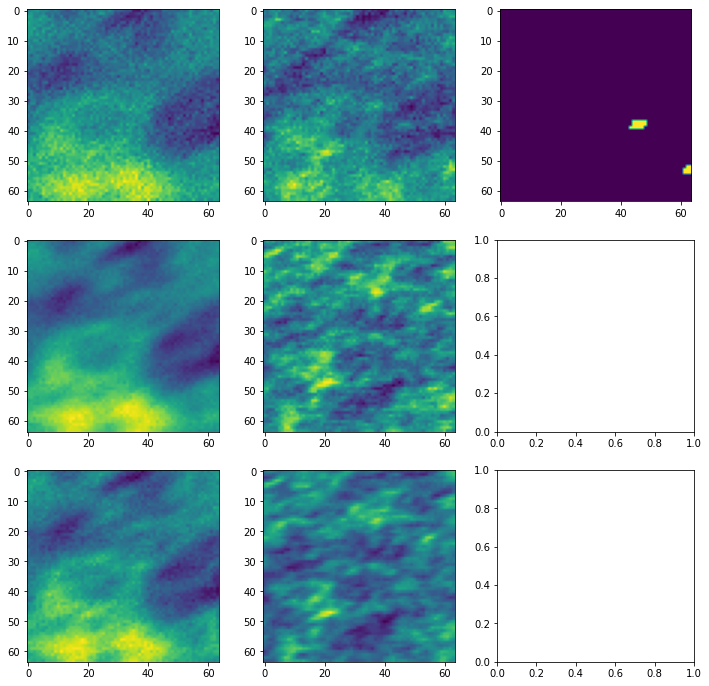

In [4]:
check_gen(test_gen)

In [5]:
filepath='/home/rt2122/Models/planck_z/f8d2.ep{epoch:04d}-vl{val_loss:.6f}-l{loss:.6f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                            save_best_only=True, mode='min', save_weights_only=False)
callbacks_list = [checkpoint]

In [ ]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=4800, epochs=10, 
                    validation_data=val_gen, validation_steps=40, 
                    callbacks=callbacks_list, initial_epoch=0)

In [ ]:
model = load_planck_model(
    '/home/rt2122/Models/planck_z/f8d2.ep0007-vl0.006934-l0.005567.hdf5')

In [ ]:
check_gen(test_gen, model)

In [ ]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=4800, epochs=20, 
                    validation_data=val_gen, validation_steps=40, 
                    callbacks=callbacks_list, initial_epoch=7)

In [ ]:
check_gen(test_gen, model)

In [ ]:
with open('/home/rt2122/Models/f8d2.ep7-20.history', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=4800, epochs=31, 
                    validation_data=val_gen, validation_steps=40, 
                    callbacks=callbacks_list, initial_epoch=20)

In [ ]:
check_gen(test_gen, model)

In [ ]:
model.save('/home/rt2122/Models/planck_z/f8d2.ep0023.hdf5')

In [ ]:
with open('/home/rt2122/Models/f8d2.ep21-23.history', 'wb') as f:
    pickle.dump(history.history, f)

In [6]:
model = load_planck_model('/home/rt2122/Models/planck_z/f8d2.ep0023.hdf5')

In [ ]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=4800, epochs=30, 
                    validation_data=val_gen, validation_steps=40, 
                    callbacks=callbacks_list, initial_epoch=23)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 24/30
4800/4800 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9987 - iou: 0.5937 - dice: 1.1874
Epoch 00024: val_loss improved from inf to 0.00669, saving model to /home/rt2122/Models/planck_z/f8d2.ep0024-vl0.006689-l0.003243.hdf5
4800/4800 [==============================] - 2505s 522ms/step - loss: 0.0032 - accuracy: 0.9987 - iou: 0.5937 - dice: 1.1874 - val_loss: 0.0067 - val_accuracy: 0.9976 - val_iou: 0.4194 - val_dice: 0.8388
Epoch 25/30
 328/4800 [=>............................] - ETA: 31:30 - loss: 0.0032 - accuracy: 0.9987 - iou: 0.6020 - dice: 1.2040

In [ ]:
check_gen(test_gen, model)

In [ ]:
with open('/home/rt2122/Models/f8d2.ep24-30.history', 'wb') as f:
    pickle.dump(history.history, f)